In [1]:
#titration plots for different solutions


from phreeqpython import PhreeqPython

import numpy as np


from matplotlib import pyplot as plt

import pandas as  pd




In [2]:
# some unecessary style settings

plt.rcParams.update({'font.size': 22,
                     #font.weight':'bold',
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'lines.linewidth' :  4,
                     'axes.labelsize'  : 20.0,
                     'axes.titlesize':  20,
                     'figure.titlesize': 'x-large',
                     'legend.fontsize': 18.0,})



In [38]:
#produce a solution with NaOH one in equilibrium with atmophere and the other one pure


# use the vitens database for all constants

# create new PhreeqPython instance
pp = PhreeqPython(database='vitens.dat')

#for differnt temperatures
temp=25

temp2=5

solution1=pp.add_solution({'temp':temp})

solution2=pp.add_solution({'temp':temp2})



In [39]:
solution1.pH

7.0

In [40]:
solution2.pH

7.0

In [69]:
# rise partial pressure of CO2 stepwise


#pCO2 range

pH_s1=[]

pH_s2=[]

CO2_list=[10**(item/30) for item in range(0, 100+1)]

for p in CO2_list:
    
    # p= concentration CO2
    #p=415 # ppm

    #partial pressure pCO2 in atm
    pCO2=p*1e-6 
    
    #because log10(0)=not defined
    if pCO2==0:
        pH_s1.append(solution1.pH)
    
        pH_s2.append(solution2.pH)
        
    else:
        #phreeqc always uses log10 values
        input_pCO2=np.log10(pCO2)


        # equalize solution with CO2
        # equilibrium with atmosphere
        solution1.equalize(['CO2(g)'], [input_pCO2])

        solution2.equalize(['CO2(g)'], [input_pCO2])

        pH_s1.append(solution1.pH)

        pH_s2.append(solution2.pH)
    
    


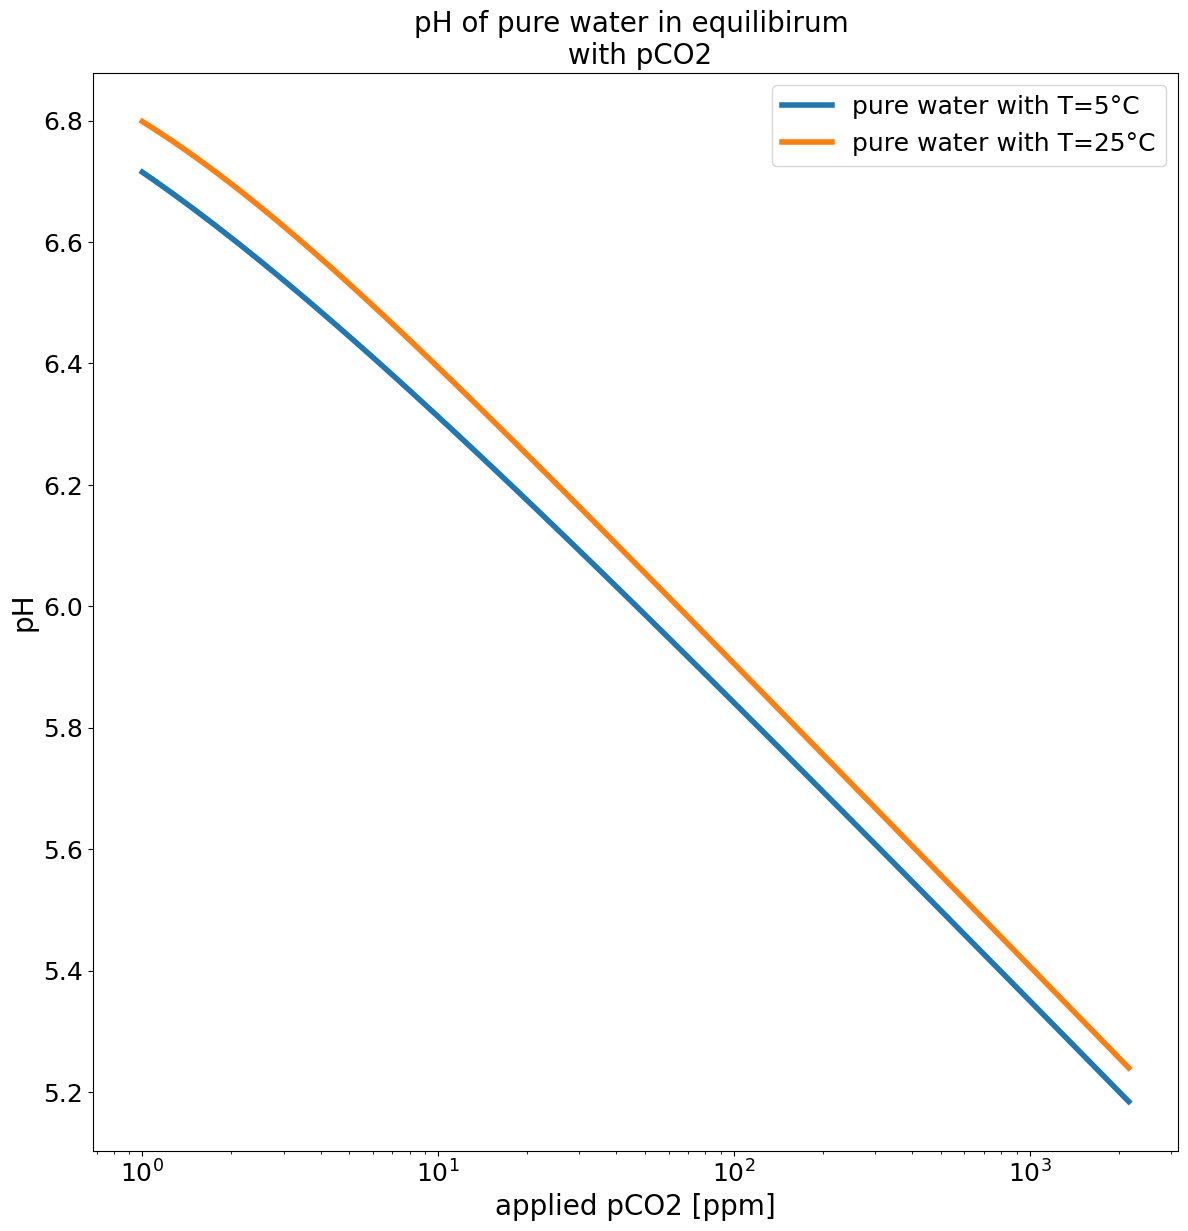

In [73]:
fig = plt.figure(figsize=[14,14])

plt.plot(CO2_list,pH_s2, label='pure water with T={}°C'.format(temp2))

plt.plot(CO2_list,pH_s1, label='pure water with T={}°C'.format(temp))



plt.ylabel('pH')

plt.xscale('log')

plt.xlabel('applied pCO2 [ppm]')

plt.legend(loc='upper right')

plt.title('pH of pure water in equilibirum \n with pCO2')


plt.savefig('titration-plot.pdf')  

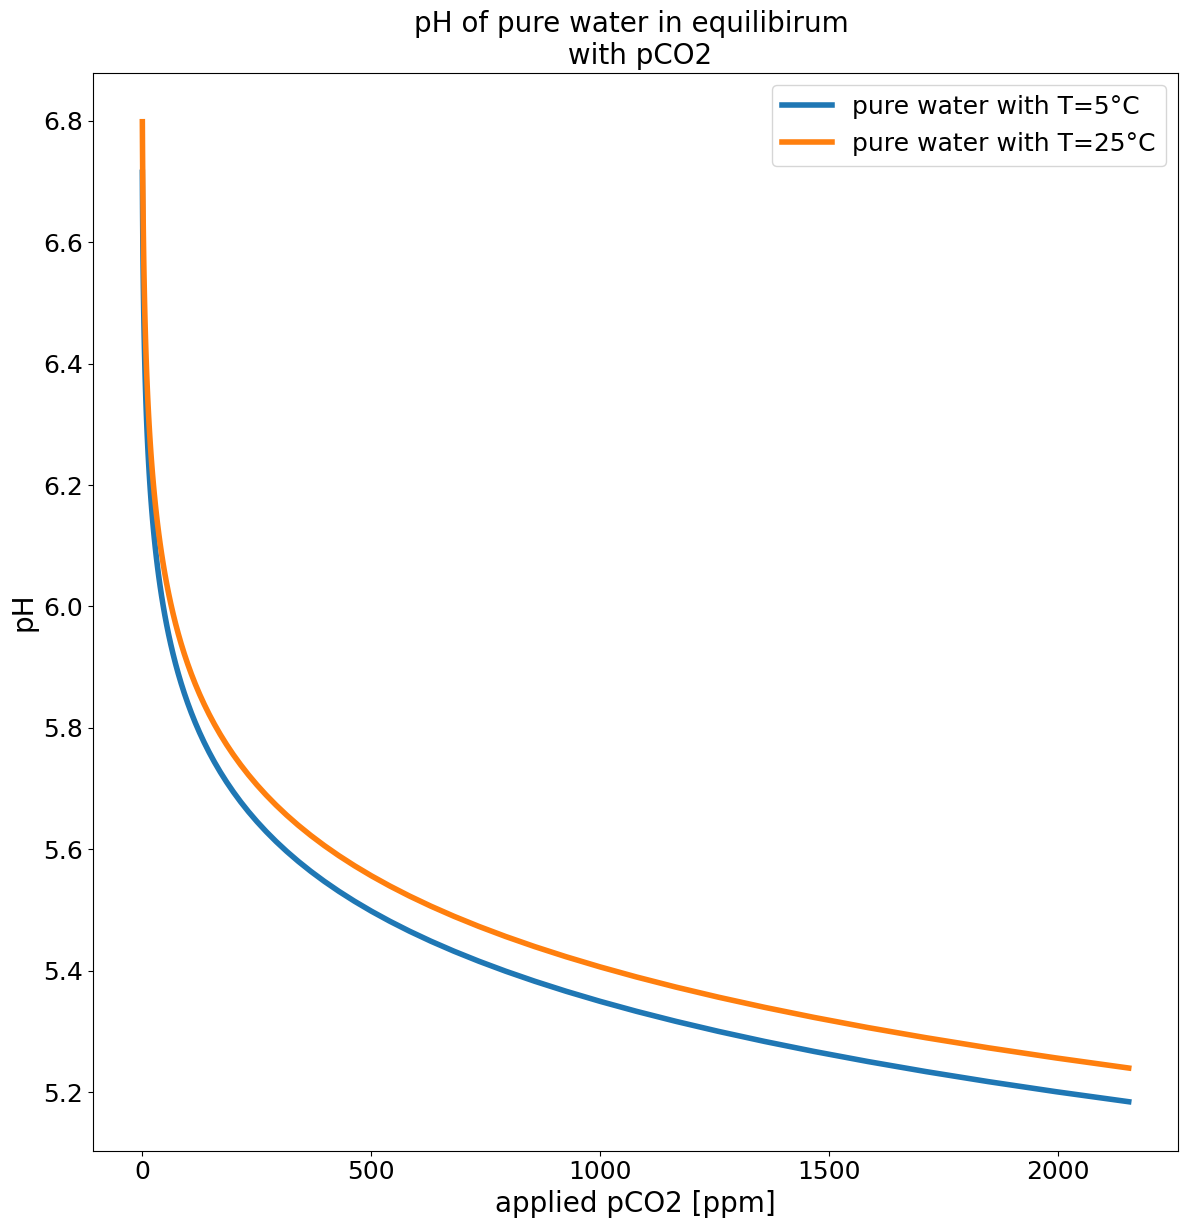

In [72]:
fig = plt.figure(figsize=[14,14])

plt.plot(CO2_list,pH_s2, label='pure water with T={}°C'.format(temp2))

plt.plot(CO2_list,pH_s1, label='pure water with T={}°C'.format(temp))



plt.ylabel('pH')


plt.xlabel('applied pCO2 [ppm]')

plt.legend(loc='upper right')

plt.title('pH of pure water in equilibirum \n with pCO2')


plt.savefig('titration-plot.pdf')  